# Data Visualization for Finance with Python

## A Complete Guide to Matplotlib, Pyplot, and Seaborn

---

### Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand the relationship** between Matplotlib, Pyplot, and Seaborn
2. **Create professional visualizations** for financial data
3. **Calculate and visualize** key financial ratios
4. **Customize plots** for presentations and reports
5. **Choose the right chart type** for different financial data

---

### What are these libraries?

| Library | Description | Best For |
|---------|-------------|----------|
| **Matplotlib** | The foundation of Python visualization. Low-level, highly customizable | Full control over every element |
| **Pyplot** | A module within Matplotlib that provides a MATLAB-like interface | Quick, simple plots |
| **Seaborn** | Built on top of Matplotlib with beautiful default styles | Statistical visualizations |

## 1. Setup and Imports

Let's start by importing all the necessary libraries.

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# For fetching real financial data
import yfinance as yf

# Date handling
from datetime import datetime, timedelta

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Loading Financial Data

We'll use `yfinance` to download real stock data. Let's get data for some major companies.

In [2]:
# Define the stocks we want to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'GS']
ticker_names = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOGL': 'Google',
    'JPM': 'JPMorgan',
    'GS': 'Goldman Sachs'
}

# Set date range (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

# Download stock data
print("Downloading stock data...")
stock_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Handle MultiIndex columns from yfinance
# yfinance returns MultiIndex columns: (Price, Ticker)
if isinstance(stock_data.columns, pd.MultiIndex):
    # Get close prices (yfinance no longer provides Adj Close by default)
    prices = stock_data['Close'].copy()
    volume = stock_data['Volume'].copy()
else:
    # Single ticker case
    prices = stock_data[['Close']].copy()
    prices.columns = [tickers[0]]
    volume = stock_data[['Volume']].copy()
    volume.columns = [tickers[0]]

# Rename columns to company names
prices.columns = [ticker_names.get(col, col) for col in prices.columns]
volume.columns = [ticker_names.get(col, col) for col in volume.columns]

print(f"\nData downloaded from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"Shape: {prices.shape}")
prices.head()


Data downloaded from 2024-01-10 to 2026-01-09
Shape: (502, 5)


,Apple,Google,Goldman Sachs,JPMorgan,Microsoft
Date,,,,,
2024-01-10,184.45,141.21,365.47,163.84,377.15
2024-01-11,183.85,141.01,363.35,163.15,378.98
2024-01-12,184.18,141.58,361.44,161.95,382.76
2024-01-16,181.91,141.42,364.02,160.94,384.54
2024-01-17,180.97,140.41,360.89,160.07,383.75


In [3]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

print("Daily Returns (first 5 rows):")
returns.head()

Daily Returns (first 5 rows):


,Apple,Google,Goldman Sachs,JPMorgan,Microsoft
Date,,,,,
2024-01-11,-0.00,-0.00,-0.01,-0.00,0.00
2024-01-12,0.00,0.00,-0.01,-0.01,0.01
2024-01-16,-0.01,-0.00,0.01,-0.01,0.00
2024-01-17,-0.01,-0.01,-0.01,-0.01,-0.00
2024-01-18,0.03,0.01,-0.00,0.00,0.01


## 3. Introduction to Matplotlib and Pyplot

### 3.1 The Basics: Figure and Axes

In Matplotlib:
- **Figure**: The entire window/page (like a canvas)
- **Axes**: The actual plot area where data is displayed
- **Pyplot (`plt`)**: A convenient interface to create figures and axes quickly

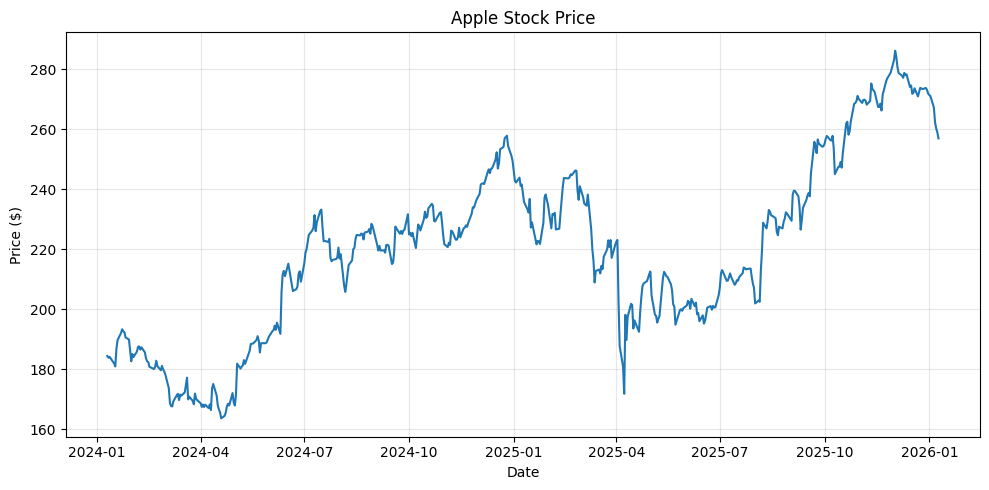

In [4]:
# Method 1: Using pyplot directly (simplest)
plt.figure(figsize=(10, 5))
plt.plot(prices['Apple'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

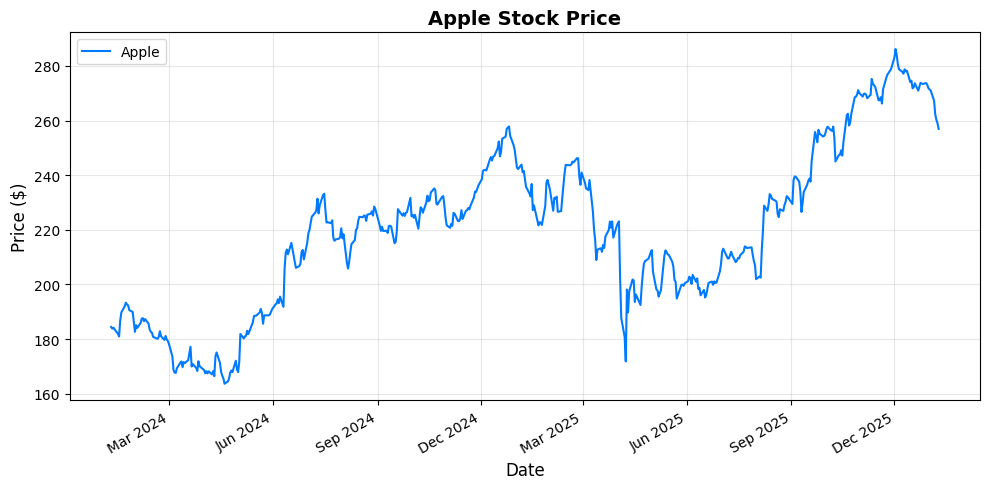

In [5]:
# Method 2: Object-oriented approach (more control)
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(prices['Apple'], label='Apple', color='#007AFF', linewidth=1.5)
ax.set_title('Apple Stock Price', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

### 3.2 Plotting Multiple Series

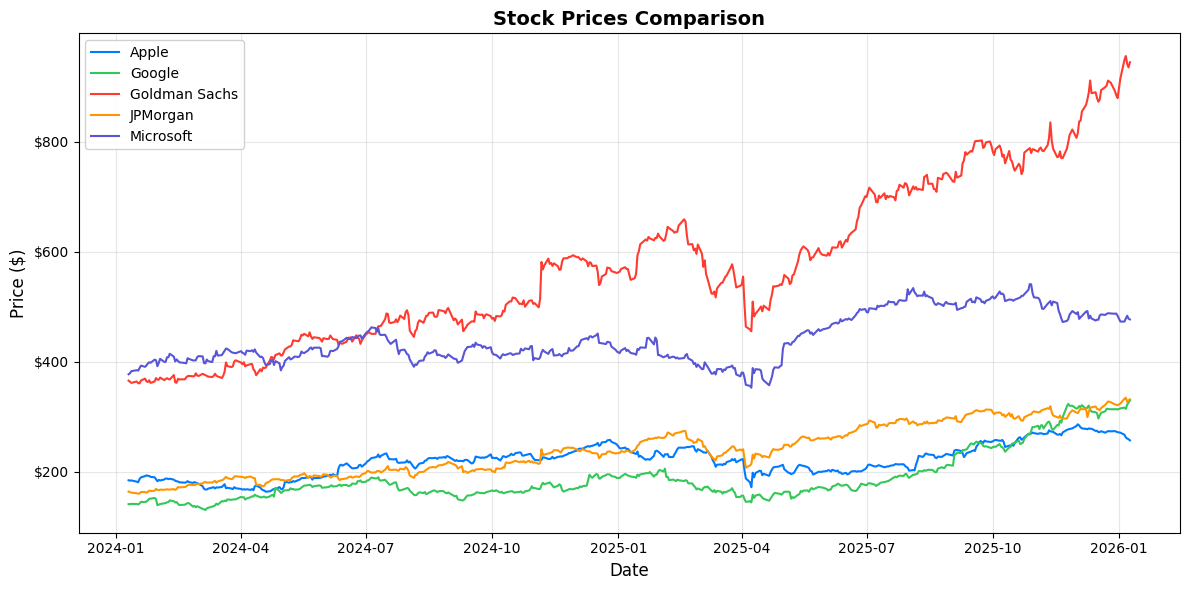

In [6]:
# Plot all stocks on the same chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for each stock
colors = ['#007AFF', '#34C759', '#FF3B30', '#FF9500', '#5856D6']

for i, column in enumerate(prices.columns):
    ax.plot(prices.index, prices[column], label=column, color=colors[i], linewidth=1.5)

ax.set_title('Stock Prices Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left', framealpha=0.9)
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### 3.3 Subplots: Multiple Charts in One Figure

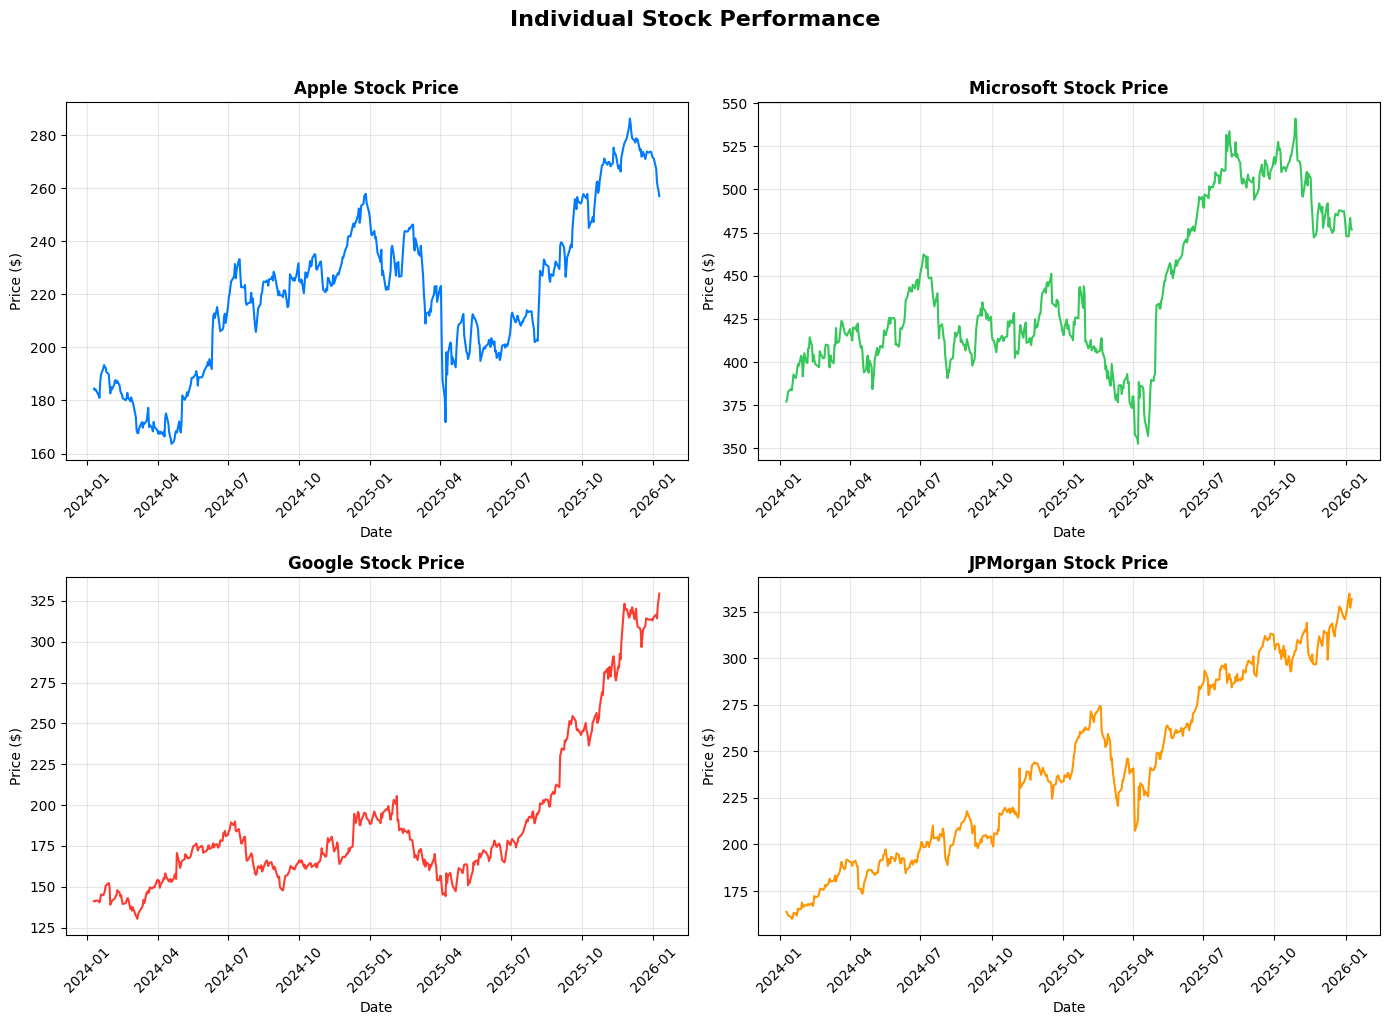

In [7]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

stocks_to_plot = ['Apple', 'Microsoft', 'Google', 'JPMorgan']

for i, stock in enumerate(stocks_to_plot):
    axes[i].plot(prices[stock], color=colors[i], linewidth=1.5)
    axes[i].set_title(f'{stock} Stock Price', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price ($)')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Individual Stock Performance', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 4. Chart Types for Financial Analysis

### 4.1 Line Charts - Price Trends

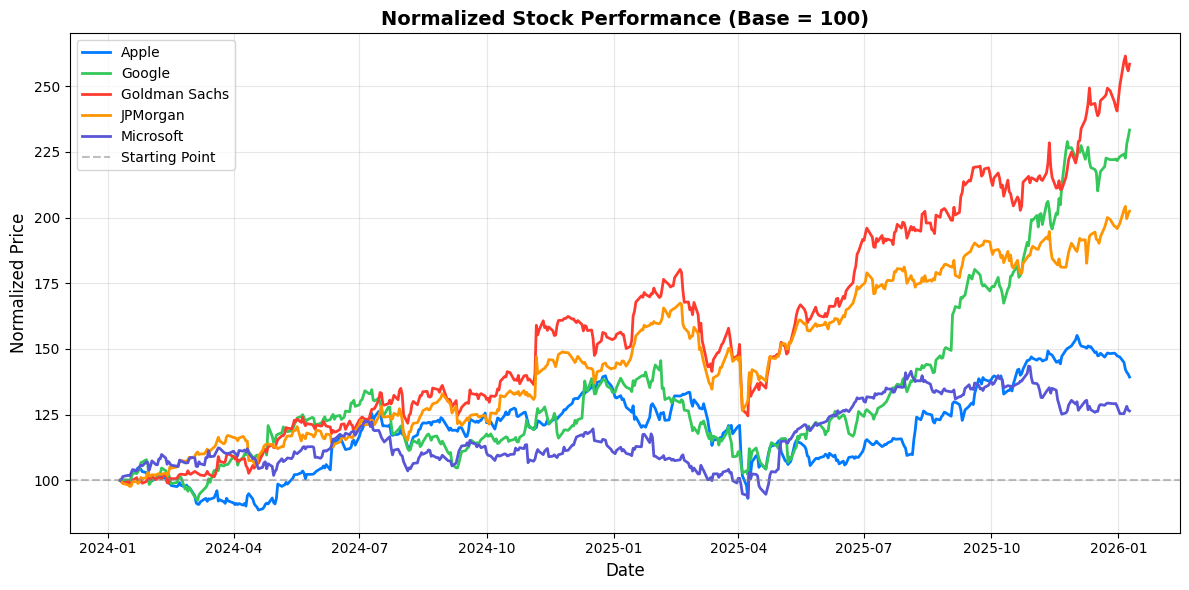

In [8]:
# Normalized prices (starting at 100) for comparison
normalized_prices = prices / prices.iloc[0] * 100

fig, ax = plt.subplots(figsize=(12, 6))

for i, column in enumerate(normalized_prices.columns):
    ax.plot(normalized_prices.index, normalized_prices[column], 
            label=column, color=colors[i], linewidth=2)

# Add a reference line at 100
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='Starting Point')

ax.set_title('Normalized Stock Performance (Base = 100)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Price', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Bar Charts - Comparing Values

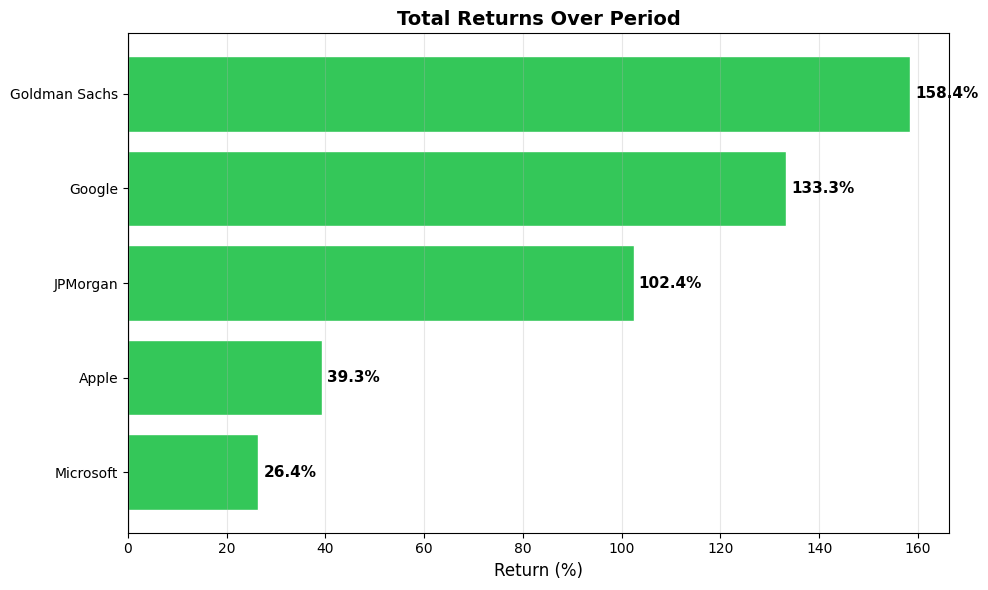

In [9]:
# Calculate total returns for each stock
total_returns = ((prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100).sort_values(ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Color bars based on positive/negative returns
bar_colors = ['#34C759' if x > 0 else '#FF3B30' for x in total_returns]

bars = ax.barh(total_returns.index, total_returns.values, color=bar_colors, edgecolor='white')

# Add value labels
for bar, value in zip(bars, total_returns.values):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}%', va='center', fontsize=11, fontweight='bold')

ax.set_title('Total Returns Over Period', fontsize=14, fontweight='bold')
ax.set_xlabel('Return (%)', fontsize=12)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Candlestick Chart (OHLC) - Technical Analysis

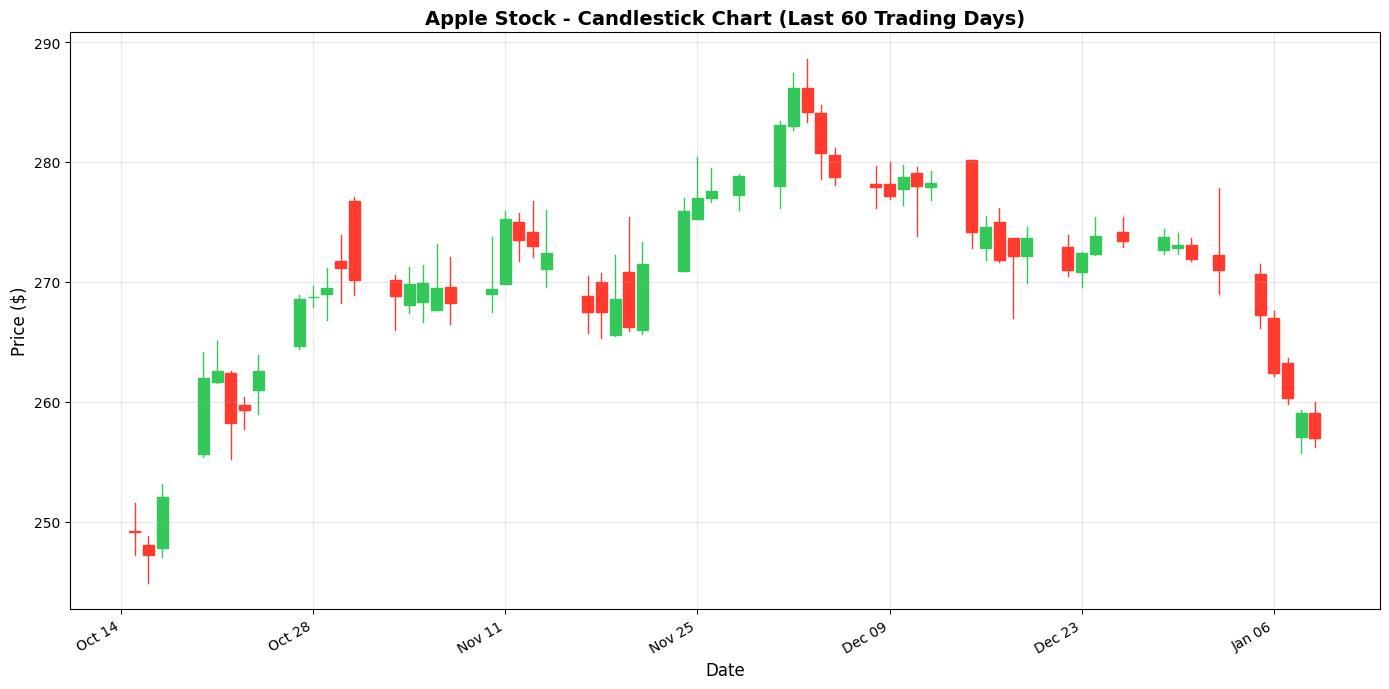

In [10]:
# Get OHLC data for Apple (last 60 days)
apple_ohlc = yf.download('AAPL', start=end_date - timedelta(days=90), end=end_date, progress=False)
apple_ohlc = apple_ohlc.tail(60)

# Flatten MultiIndex columns if present
if isinstance(apple_ohlc.columns, pd.MultiIndex):
    apple_ohlc.columns = apple_ohlc.columns.get_level_values(0)

# Create candlestick chart manually
fig, ax = plt.subplots(figsize=(14, 7))

# Define colors
up_color = '#34C759'  # Green for up days
down_color = '#FF3B30'  # Red for down days

for idx, row in apple_ohlc.iterrows():
    # Determine if it's an up or down day
    if row['Close'] >= row['Open']:
        color = up_color
    else:
        color = down_color
    
    # Draw the high-low line (wick)
    ax.plot([idx, idx], [row['Low'], row['High']], color=color, linewidth=1)
    
    # Draw the open-close rectangle (body)
    body_bottom = min(row['Open'], row['Close'])
    body_height = abs(row['Close'] - row['Open'])
    ax.bar(idx, body_height, bottom=body_bottom, width=0.8, color=color, edgecolor=color)

ax.set_title('Apple Stock - Candlestick Chart (Last 60 Trading Days)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

### 4.4 Histogram - Return Distribution

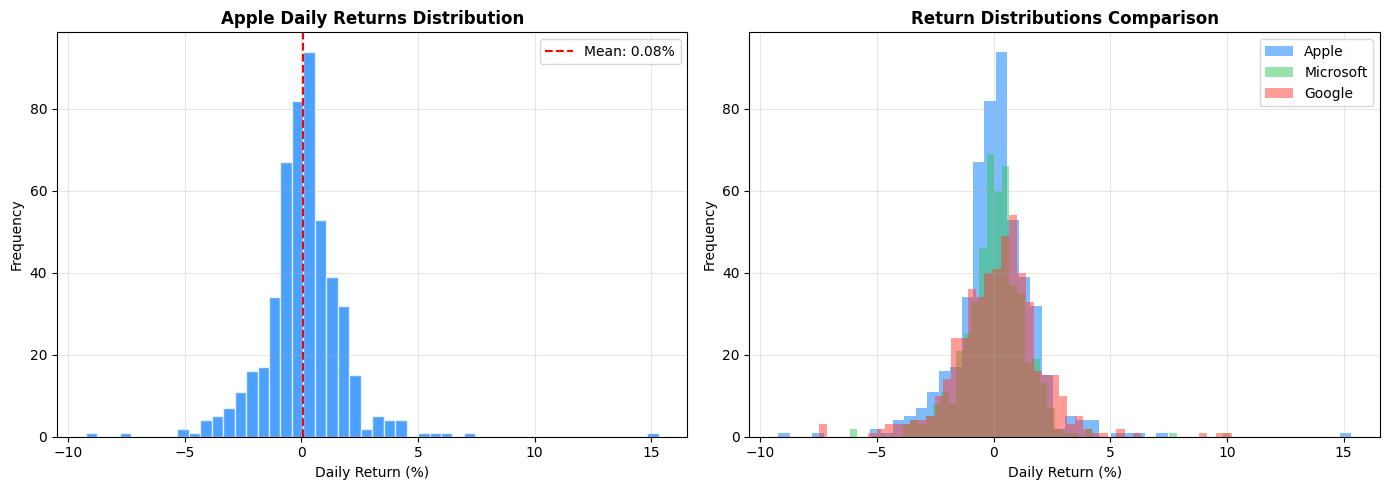

In [11]:
# Plot histogram of returns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Single stock histogram
axes[0].hist(returns['Apple'] * 100, bins=50, color='#007AFF', edgecolor='white', alpha=0.7)
axes[0].axvline(x=returns['Apple'].mean() * 100, color='red', linestyle='--', 
                label=f'Mean: {returns["Apple"].mean()*100:.2f}%')
axes[0].set_title('Apple Daily Returns Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Daily Return (%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Multiple stocks overlapping
for i, stock in enumerate(['Apple', 'Microsoft', 'Google']):
    axes[1].hist(returns[stock] * 100, bins=50, alpha=0.5, label=stock, color=colors[i])

axes[1].set_title('Return Distributions Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Introduction to Seaborn

Seaborn provides beautiful default styles and is excellent for statistical visualizations.

### 5.1 Setting Up Seaborn Styles

In [12]:
# Available seaborn styles
print("Available Seaborn styles:")
print("- darkgrid (default)")
print("- whitegrid")
print("- dark")
print("- white")
print("- ticks")

# Set a nice style
sns.set_style("whitegrid")
sns.set_palette("husl")

Available Seaborn styles:
- darkgrid (default)
- whitegrid
- dark
- white
- ticks


### 5.2 Distribution Plots

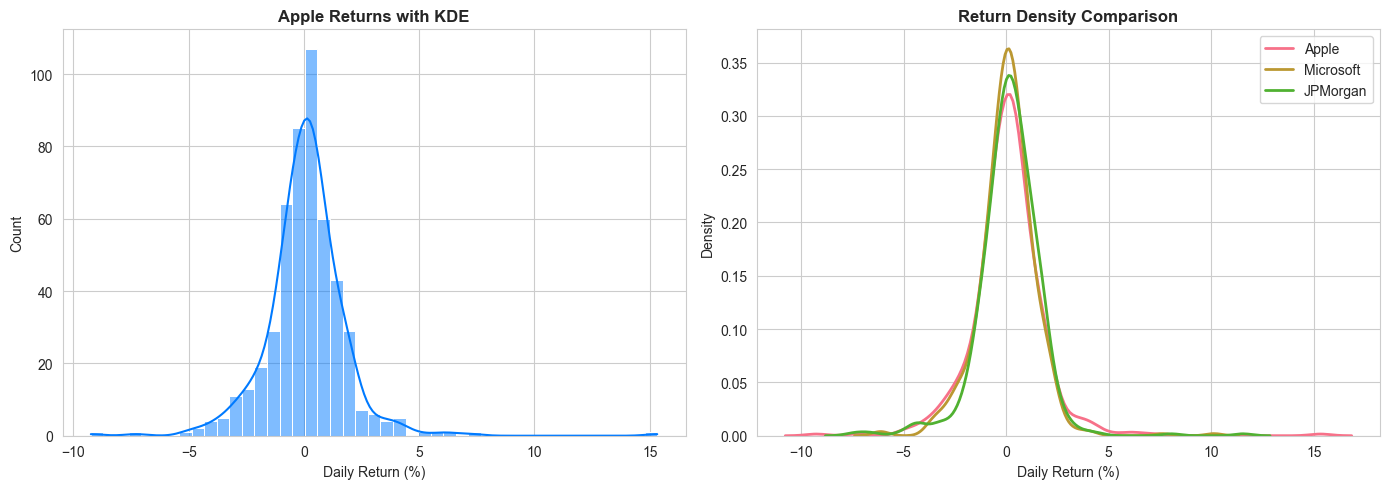

In [13]:
# KDE (Kernel Density Estimation) plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(data=returns['Apple'] * 100, kde=True, ax=axes[0], color='#007AFF')
axes[0].set_title('Apple Returns with KDE', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Daily Return (%)')

# Multiple KDE plots
for stock in ['Apple', 'Microsoft', 'JPMorgan']:
    sns.kdeplot(data=returns[stock] * 100, ax=axes[1], label=stock, linewidth=2)

axes[1].set_title('Return Density Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

### 5.3 Box Plots and Violin Plots

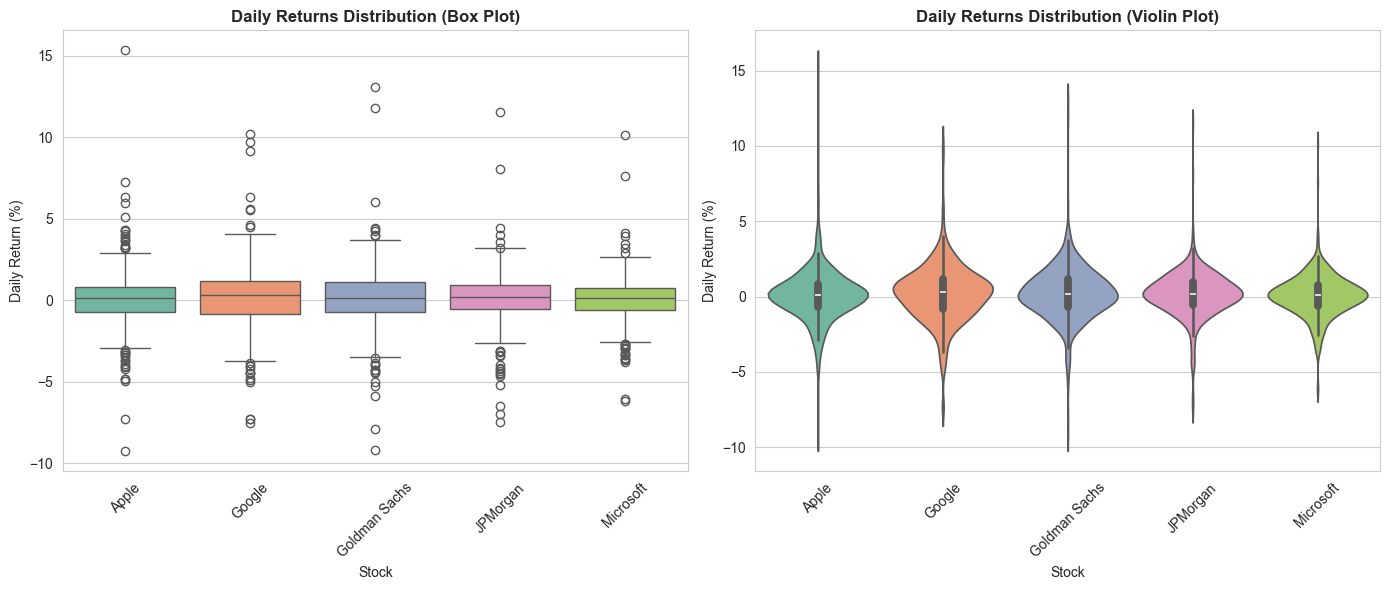

In [14]:
# Prepare data for box plot
returns_melted = returns.melt(var_name='Stock', value_name='Return')
returns_melted['Return'] = returns_melted['Return'] * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(x='Stock', y='Return', data=returns_melted, ax=axes[0], palette='Set2')
axes[0].set_title('Daily Returns Distribution (Box Plot)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Stock')
axes[0].set_ylabel('Daily Return (%)')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(x='Stock', y='Return', data=returns_melted, ax=axes[1], palette='Set2')
axes[1].set_title('Daily Returns Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Stock')
axes[1].set_ylabel('Daily Return (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 5.4 Correlation Heatmap

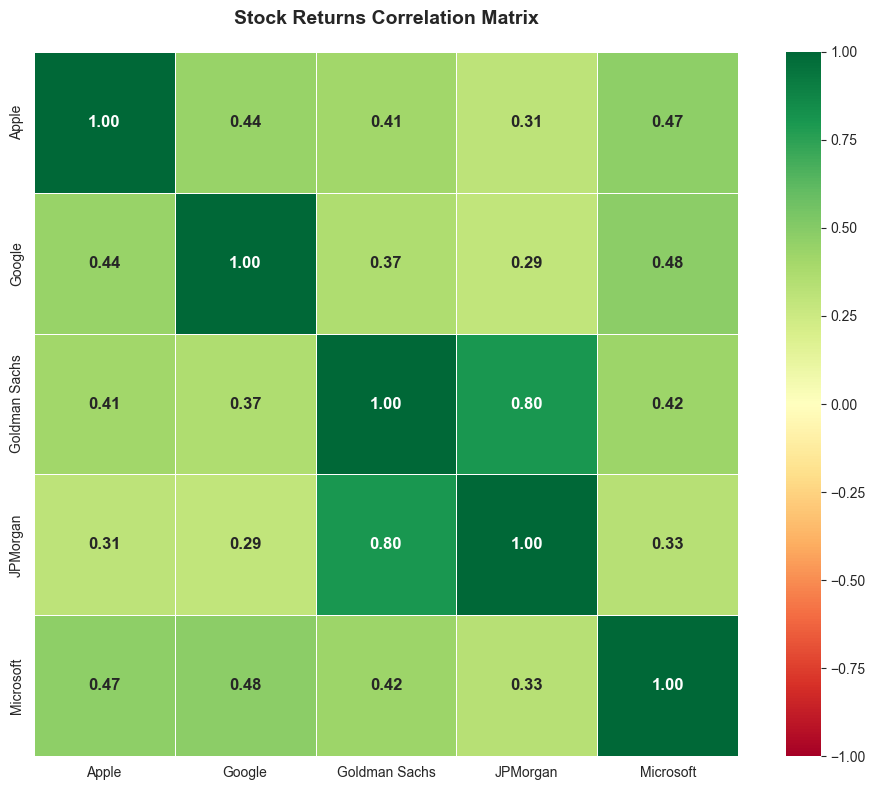

In [15]:
# Calculate correlation matrix
correlation_matrix = returns.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            square=True,
            linewidths=0.5,
            ax=ax,
            vmin=-1, vmax=1,
            annot_kws={'size': 12, 'weight': 'bold'})

ax.set_title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 5.5 Pair Plot - Relationships Between Variables

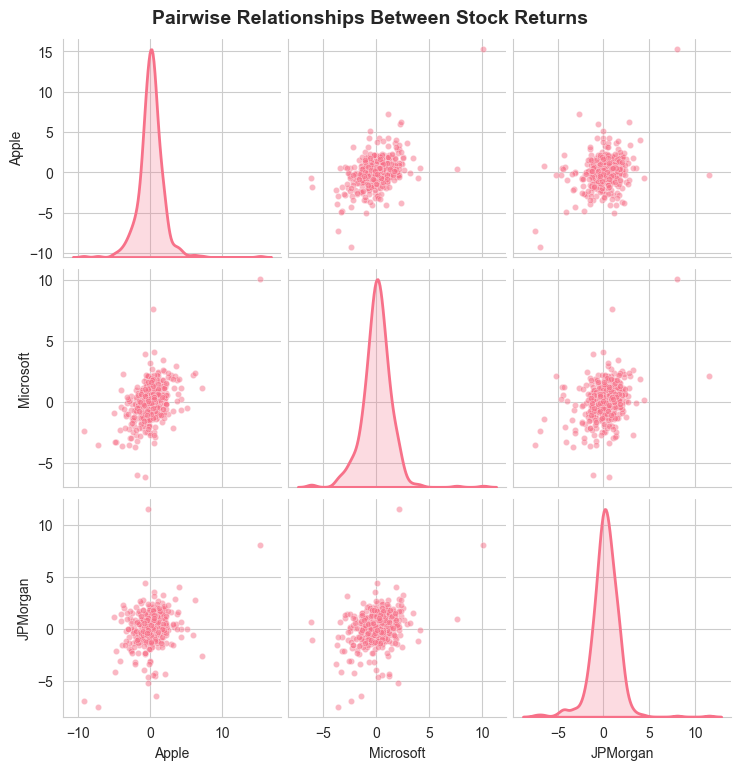

In [16]:
# Create pair plot for a subset of stocks (to keep it readable)
subset_returns = returns[['Apple', 'Microsoft', 'JPMorgan']] * 100

pair_plot = sns.pairplot(subset_returns, 
                         diag_kind='kde',
                         plot_kws={'alpha': 0.5, 's': 20},
                         diag_kws={'linewidth': 2})

pair_plot.fig.suptitle('Pairwise Relationships Between Stock Returns', y=1.02, fontsize=14, fontweight='bold')
plt.show()

### 5.6 Regression Plot

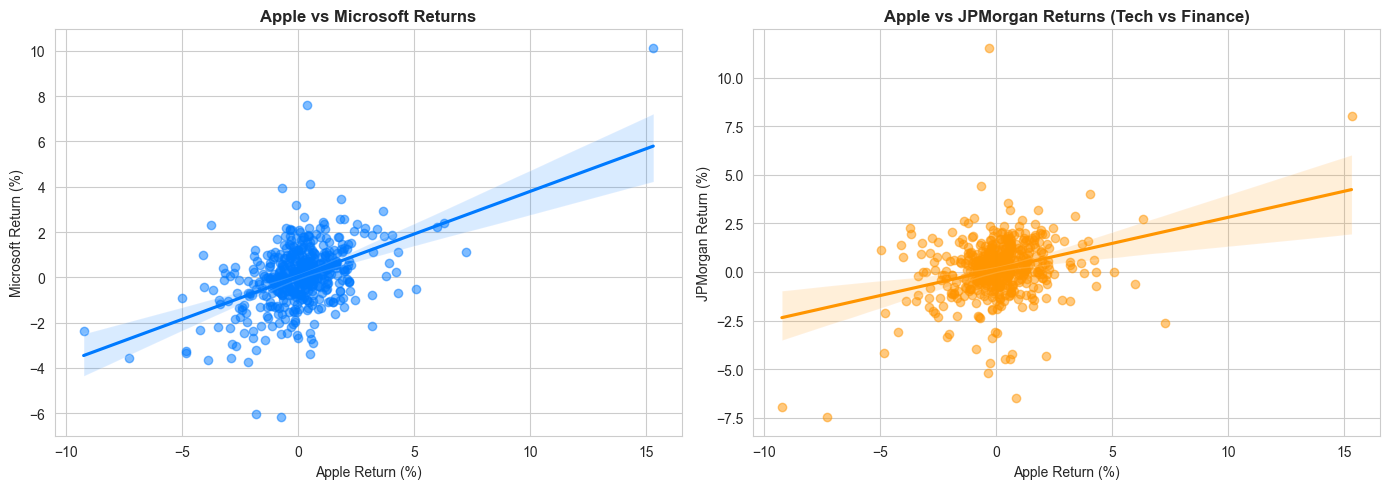

In [17]:
# Regression plot showing relationship between two stocks
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Apple vs Microsoft
sns.regplot(x=returns['Apple']*100, y=returns['Microsoft']*100, 
            ax=axes[0], scatter_kws={'alpha': 0.5}, color='#007AFF')
axes[0].set_title('Apple vs Microsoft Returns', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Apple Return (%)')
axes[0].set_ylabel('Microsoft Return (%)')

# Tech (Apple) vs Finance (JPMorgan)
sns.regplot(x=returns['Apple']*100, y=returns['JPMorgan']*100, 
            ax=axes[1], scatter_kws={'alpha': 0.5}, color='#FF9500')
axes[1].set_title('Apple vs JPMorgan Returns (Tech vs Finance)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Apple Return (%)')
axes[1].set_ylabel('JPMorgan Return (%)')

plt.tight_layout()
plt.show()

## 6. Financial Ratios and Metrics

Now let's calculate and visualize important financial ratios.

### 6.1 Risk Metrics

# Financial Performance Metrics - Definitions

## Annual Return
The average percentage gain or loss of an investment over a one-year period. It represents the annualized rate of return, often calculated by compounding daily or monthly returns to show what an investor would earn (or lose) if the performance continued for a full year.

## Annual Volatility
A statistical measure of the dispersion of returns over a year, typically calculated as the standard deviation of returns annualized. Higher volatility indicates larger price swings and greater risk, while lower volatility suggests more stable returns.

## Sharpe Ratio
A risk-adjusted performance metric that measures excess return per unit of risk. Calculated as (Return - Risk-Free Rate) / Volatility. A higher Sharpe ratio indicates better risk-adjusted returns. Generally, a ratio above 1 is considered good, above 2 is very good, and above 3 is excellent.

## Sortino Ratio
Similar to the Sharpe ratio but only considers downside volatility (negative returns) rather than total volatility. This provides a more accurate picture of risk for investors who are primarily concerned with losses rather than overall price fluctuations. Higher values indicate better risk-adjusted returns.

## Max Drawdown
The maximum observed loss from a peak to a trough before a new peak is achieved, expressed as a percentage. It represents the worst possible loss an investor would have experienced during a specific time period. For example, a -30% max drawdown means the investment fell 30% from its highest point.

## VaR (95%) - Value at Risk
A statistical measure that estimates the maximum potential loss an investment could face over a given time period with 95% confidence. For example, a 1-day VaR of -2% means there's only a 5% chance the investment will lose more than 2% in a single day.

## CVaR (95%) - Conditional Value at Risk
Also known as Expected Shortfall, this measures the average loss that occurs in the worst 5% of cases (beyond the VaR threshold). It provides insight into the severity of extreme losses. CVaR is always worse than VaR and gives a more complete picture of tail risk.

## Skewness
A measure of the asymmetry of the return distribution. Negative skewness indicates more frequent small gains and occasional large losses (undesirable). Positive skewness indicates more frequent small losses and occasional large gains (desirable). A value of 0 indicates a perfectly symmetric distribution.

## Kurtosis
A measure of the "tailedness" of the return distribution, indicating the likelihood of extreme outcomes. Higher kurtosis (>3) means more extreme returns (fat tails), suggesting higher risk of large gains or losses. Lower kurtosis (<3) indicates fewer extreme events. Normal distribution has a kurtosis of 3.

In [18]:
# Calculate key risk metrics
def calculate_risk_metrics(returns_series, risk_free_rate=0.05):
    """
    Calculate various risk metrics for a return series.
    
    Parameters:
    -----------
    returns_series : pd.Series
        Daily returns
    risk_free_rate : float
        Annual risk-free rate (default 5%)
    
    Returns:
    --------
    dict : Dictionary containing all calculated metrics
    """
    # Number of trading days
    trading_days = 252
    
    # Basic statistics
    mean_daily = returns_series.mean()
    std_daily = returns_series.std()
    
    # Annualized metrics
    annual_return = mean_daily * trading_days
    annual_volatility = std_daily * np.sqrt(trading_days)
    
    # Sharpe Ratio
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
    
    # Sortino Ratio (uses only downside deviation)
    downside_returns = returns_series[returns_series < 0]
    downside_std = downside_returns.std() * np.sqrt(trading_days)
    sortino_ratio = (annual_return - risk_free_rate) / downside_std if downside_std > 0 else np.nan
    
    # Maximum Drawdown
    cumulative = (1 + returns_series).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    
    # Value at Risk (VaR) - 95% confidence
    var_95 = returns_series.quantile(0.05)
    
    # Conditional VaR (Expected Shortfall)
    cvar_95 = returns_series[returns_series <= var_95].mean()
    
    return {
        'Annual Return': annual_return,
        'Annual Volatility': annual_volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown': max_drawdown,
        'VaR (95%)': var_95,
        'CVaR (95%)': cvar_95,
        'Skewness': returns_series.skew(),
        'Kurtosis': returns_series.kurtosis()
    }

# Calculate metrics for all stocks
risk_metrics = {}
for stock in returns.columns:
    risk_metrics[stock] = calculate_risk_metrics(returns[stock])

# Convert to DataFrame for display
risk_df = pd.DataFrame(risk_metrics).T
risk_df = risk_df.round(4)

print("Risk Metrics for All Stocks:")
print("="*80)
risk_df

Risk Metrics for All Stocks:


,Annual Return,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,VaR (95%),CVaR (95%),Skewness,Kurtosis
Apple,0.21,0.28,0.56,0.79,-0.33,-0.03,-0.04,1.01,13.90
Google,0.47,0.30,1.40,2.06,-0.30,-0.03,-0.04,0.29,4.54
Goldman Sachs,0.52,0.29,1.63,2.33,-0.31,-0.02,-0.04,0.63,10.10
JPMorgan,0.38,0.24,1.38,1.73,-0.24,-0.02,-0.04,0.11,10.09
Microsoft,0.14,0.22,0.42,0.59,-0.24,-0.02,-0.03,0.53,7.93


### 6.2 Visualizing Risk Metrics

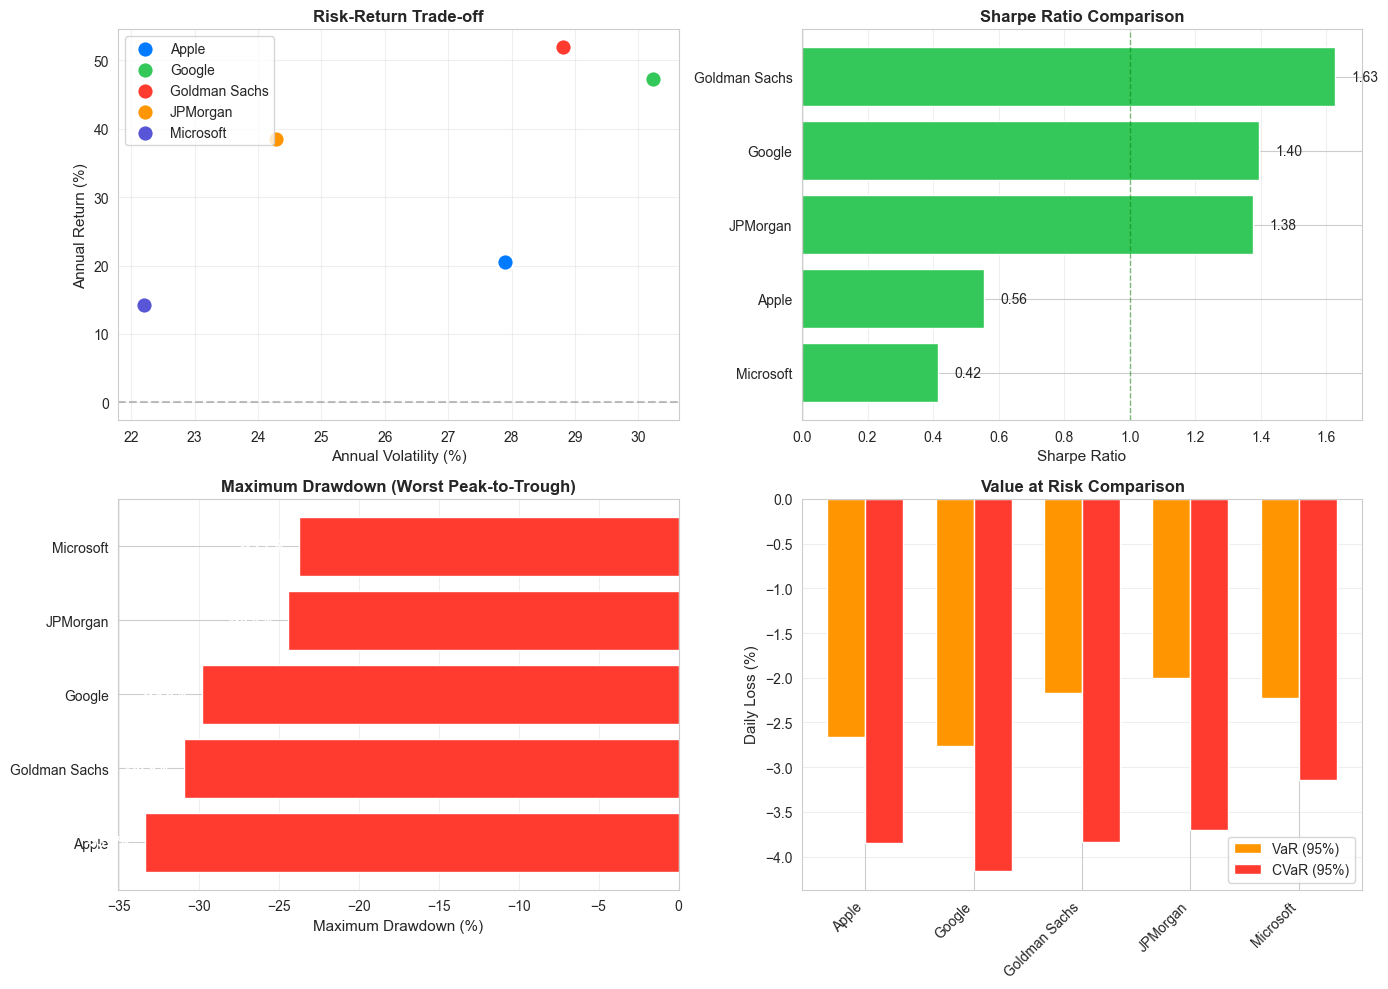

In [19]:
# Create a comprehensive risk metrics visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Risk-Return Scatter Plot
ax1 = axes[0, 0]
for i, stock in enumerate(risk_df.index):
    ax1.scatter(risk_df.loc[stock, 'Annual Volatility'] * 100, 
                risk_df.loc[stock, 'Annual Return'] * 100,
                s=150, c=colors[i], label=stock, edgecolor='white', linewidth=2)
ax1.set_xlabel('Annual Volatility (%)', fontsize=11)
ax1.set_ylabel('Annual Return (%)', fontsize=11)
ax1.set_title('Risk-Return Trade-off', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# 2. Sharpe Ratio Bar Chart
ax2 = axes[0, 1]
sharpe_sorted = risk_df['Sharpe Ratio'].sort_values(ascending=True)
bar_colors = ['#34C759' if x > 0 else '#FF3B30' for x in sharpe_sorted]
bars = ax2.barh(sharpe_sorted.index, sharpe_sorted.values, color=bar_colors, edgecolor='white')
ax2.set_xlabel('Sharpe Ratio', fontsize=11)
ax2.set_title('Sharpe Ratio Comparison', fontsize=12, fontweight='bold')
ax2.axvline(x=0, color='black', linewidth=0.8)
ax2.axvline(x=1, color='green', linewidth=1, linestyle='--', alpha=0.5, label='Good (>1)')
ax2.grid(True, axis='x', alpha=0.3)
for bar, value in zip(bars, sharpe_sorted.values):
    ax2.text(value + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', va='center', fontsize=10)

# 3. Maximum Drawdown
ax3 = axes[1, 0]
mdd_sorted = (risk_df['Max Drawdown'] * 100).sort_values(ascending=True)
ax3.barh(mdd_sorted.index, mdd_sorted.values, color='#FF3B30', edgecolor='white')
ax3.set_xlabel('Maximum Drawdown (%)', fontsize=11)
ax3.set_title('Maximum Drawdown (Worst Peak-to-Trough)', fontsize=12, fontweight='bold')
ax3.grid(True, axis='x', alpha=0.3)
for i, (stock, value) in enumerate(mdd_sorted.items()):
    ax3.text(value - 1, i, f'{value:.1f}%', va='center', ha='right', 
             fontsize=10, color='white', fontweight='bold')

# 4. VaR Comparison
ax4 = axes[1, 1]
var_data = pd.DataFrame({
    'VaR (95%)': risk_df['VaR (95%)'] * 100,
    'CVaR (95%)': risk_df['CVaR (95%)'] * 100
})
x = np.arange(len(var_data.index))
width = 0.35
ax4.bar(x - width/2, var_data['VaR (95%)'], width, label='VaR (95%)', color='#FF9500')
ax4.bar(x + width/2, var_data['CVaR (95%)'], width, label='CVaR (95%)', color='#FF3B30')
ax4.set_ylabel('Daily Loss (%)', fontsize=11)
ax4.set_title('Value at Risk Comparison', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(var_data.index, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Drawdown Analysis

# Drawdown Analysis

## Definition
Drawdown analysis is a risk assessment technique that examines the decline in an investment's value from its peak to its trough over time. It helps investors understand the potential losses they might experience and how long it takes to recover from those losses.

## Key Components

### 1. Drawdown
The percentage decline from a historical peak in value to a subsequent low. Calculated as:
```
Drawdown = (Trough Value - Peak Value) / Peak Value × 100%
```

### 2. Maximum Drawdown (MDD)
The largest peak-to-trough decline over the entire analysis period. This represents the worst-case loss scenario an investor would have experienced.

### 3. Drawdown Duration
The length of time between:
- **Peak to Trough**: How long it took to reach the bottom
- **Peak to Recovery**: How long it took to get back to the previous peak (total drawdown period)

### 4. Underwater Periods
Periods when the investment value is below its previous peak. Also called "underwater equity" or "recovery time."

## What Drawdown Analysis Shows

### Risk Tolerance Assessment
- Helps investors understand if they can psychologically handle specific loss levels
- Shows realistic worst-case scenarios based on historical data

### Recovery Characteristics
- How quickly investments bounce back after declines
- Whether an investment has long, painful recovery periods

### Comparison Tool
- Compare the risk profiles of different investments
- Assets with similar returns but different drawdowns have very different risk characteristics

## Practical Example
If a stock portfolio:
- Peaks at $100,000
- Falls to $70,000 (30% drawdown)
- Takes 18 months to return to $100,000

The drawdown analysis would show:
- **Maximum Drawdown**: -30%
- **Recovery Period**: 18 months
- **Total Underwater Period**: Time from peak to full recovery

## Why It Matters
Unlike volatility (which treats upside and downside equally), drawdown analysis focuses specifically on losses - what most investors actually care about. It answers critical questions:
- "How much could I lose?"
- "How long might I be in the red?"
- "Can I stay invested during such periods?"

## Types of Drawdown Analysis

### Rolling Drawdown
Continuously calculated drawdowns at every point in time, showing the current state relative to the most recent peak.

### Drawdown Distribution
Statistical analysis of all drawdowns to understand frequency and severity patterns.

### Conditional Drawdown at Risk (CDaR)
The average of the worst drawdowns, similar to CVaR but for drawdowns rather than returns.

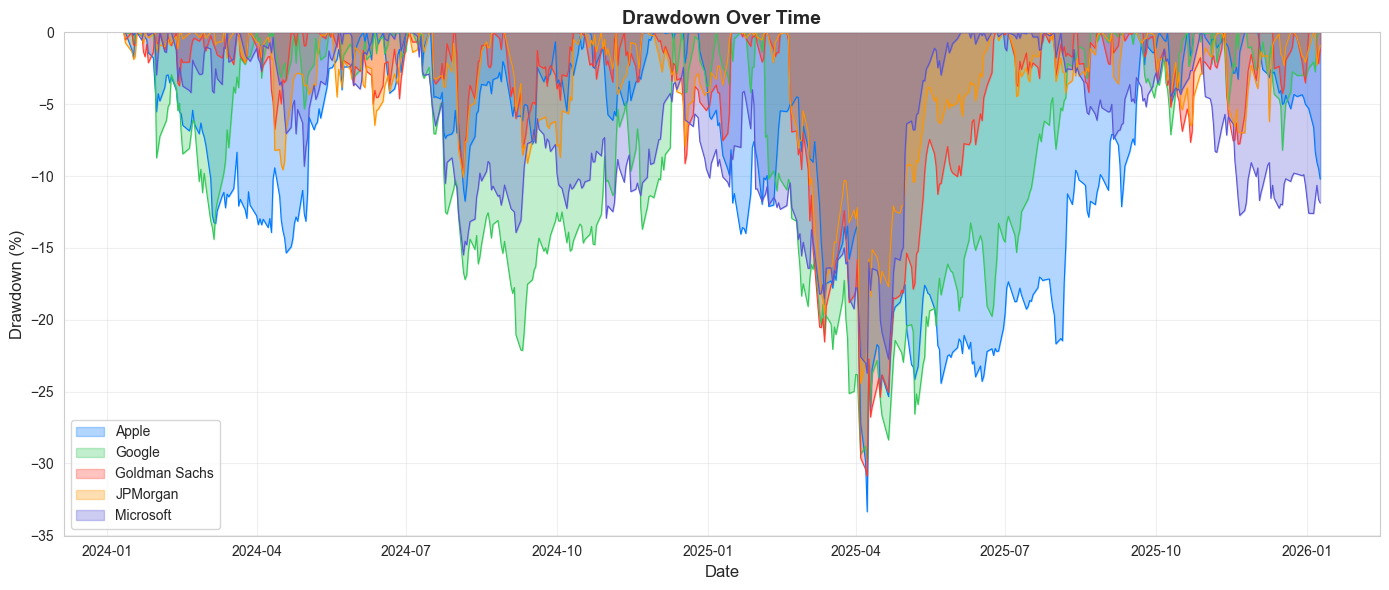

In [20]:
# Calculate drawdown for each stock
def calculate_drawdown(returns_series):
    cumulative = (1 + returns_series).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    return drawdown * 100  # Convert to percentage

# Create drawdown DataFrame
drawdowns = returns.apply(calculate_drawdown)

# Plot drawdowns
fig, ax = plt.subplots(figsize=(14, 6))

for i, stock in enumerate(drawdowns.columns):
    ax.fill_between(drawdowns.index, drawdowns[stock], 0, alpha=0.3, label=stock, color=colors[i])
    ax.plot(drawdowns.index, drawdowns[stock], linewidth=0.8, color=colors[i])

ax.set_title('Drawdown Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Drawdown (%)', fontsize=12)
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_ylim(top=0)

plt.tight_layout()
plt.show()

### 6.4 Rolling Statistics

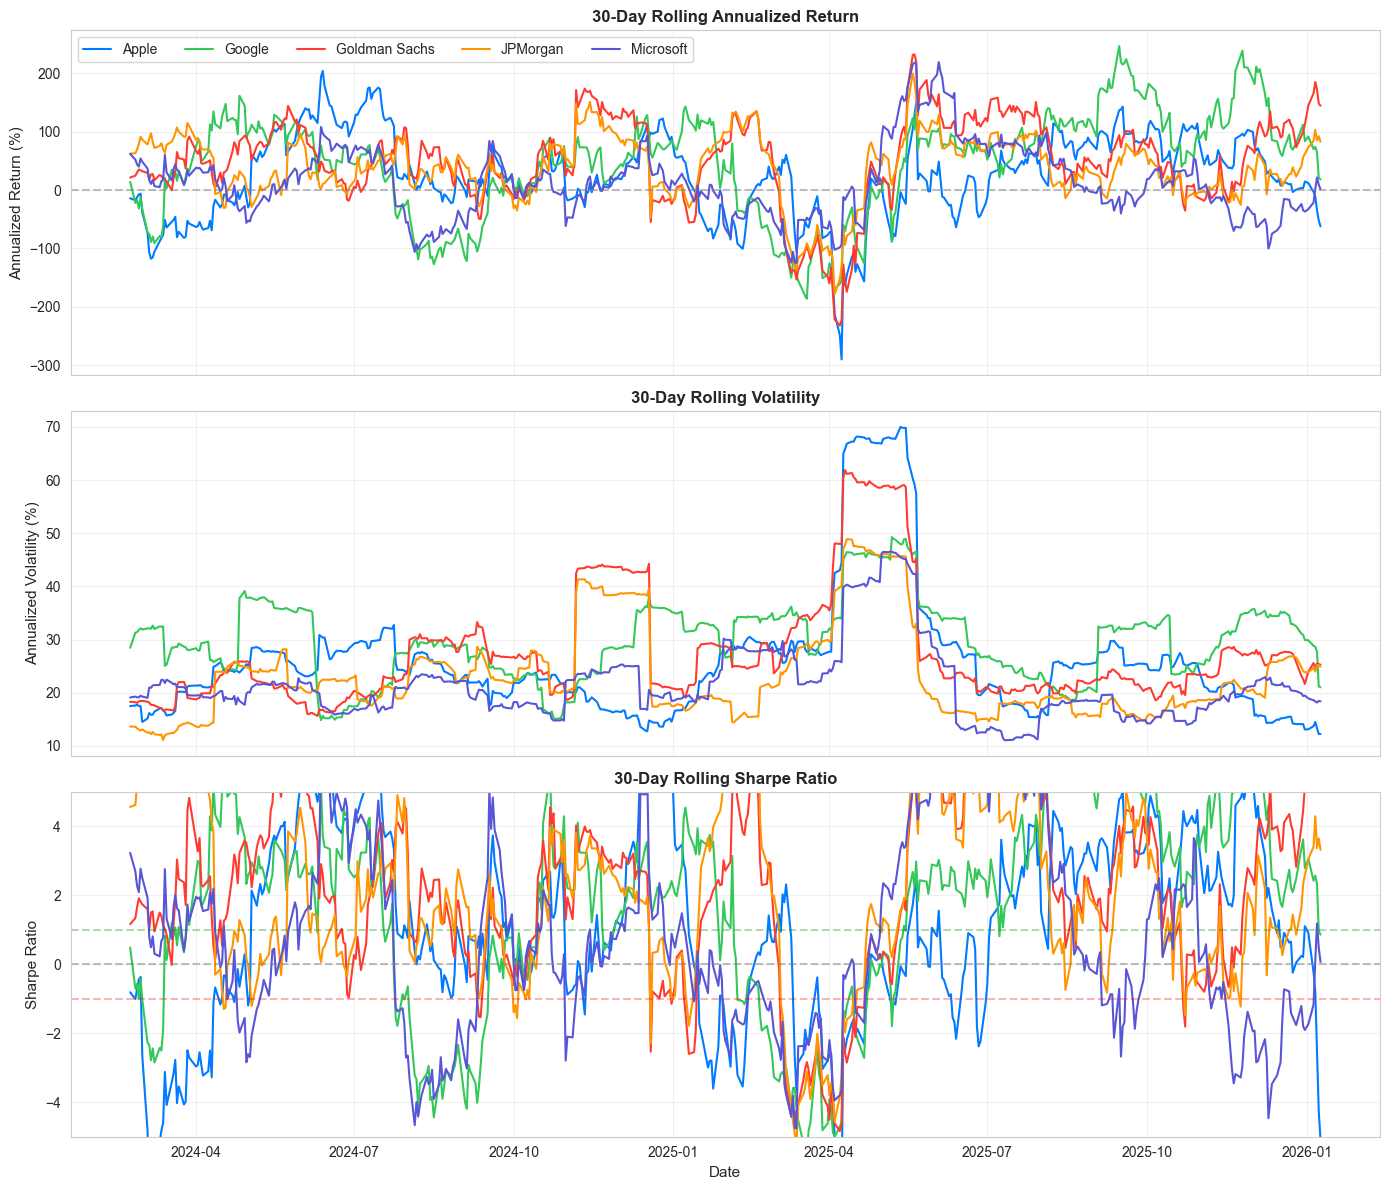

In [21]:
# Calculate rolling statistics (30-day window)
window = 30

rolling_mean = returns.rolling(window=window).mean() * 252  # Annualized
rolling_std = returns.rolling(window=window).std() * np.sqrt(252)  # Annualized
rolling_sharpe = rolling_mean / rolling_std

# Plot rolling Sharpe ratio
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Rolling Return
for i, stock in enumerate(rolling_mean.columns):
    axes[0].plot(rolling_mean.index, rolling_mean[stock] * 100, 
                 label=stock, color=colors[i], linewidth=1.5)
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0].set_ylabel('Annualized Return (%)', fontsize=11)
axes[0].set_title(f'{window}-Day Rolling Annualized Return', fontsize=12, fontweight='bold')
axes[0].legend(loc='upper left', ncol=5)
axes[0].grid(True, alpha=0.3)

# Rolling Volatility
for i, stock in enumerate(rolling_std.columns):
    axes[1].plot(rolling_std.index, rolling_std[stock] * 100, 
                 label=stock, color=colors[i], linewidth=1.5)
axes[1].set_ylabel('Annualized Volatility (%)', fontsize=11)
axes[1].set_title(f'{window}-Day Rolling Volatility', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Rolling Sharpe
for i, stock in enumerate(rolling_sharpe.columns):
    axes[2].plot(rolling_sharpe.index, rolling_sharpe[stock], 
                 label=stock, color=colors[i], linewidth=1.5)
axes[2].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[2].axhline(y=1, color='green', linestyle='--', alpha=0.3, label='Good Sharpe (1)')
axes[2].axhline(y=-1, color='red', linestyle='--', alpha=0.3)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].set_ylabel('Sharpe Ratio', fontsize=11)
axes[2].set_title(f'{window}-Day Rolling Sharpe Ratio', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(-5, 5)

plt.tight_layout()
plt.show()

## 7. Advanced Visualizations

### 7.1 Price and Volume Chart

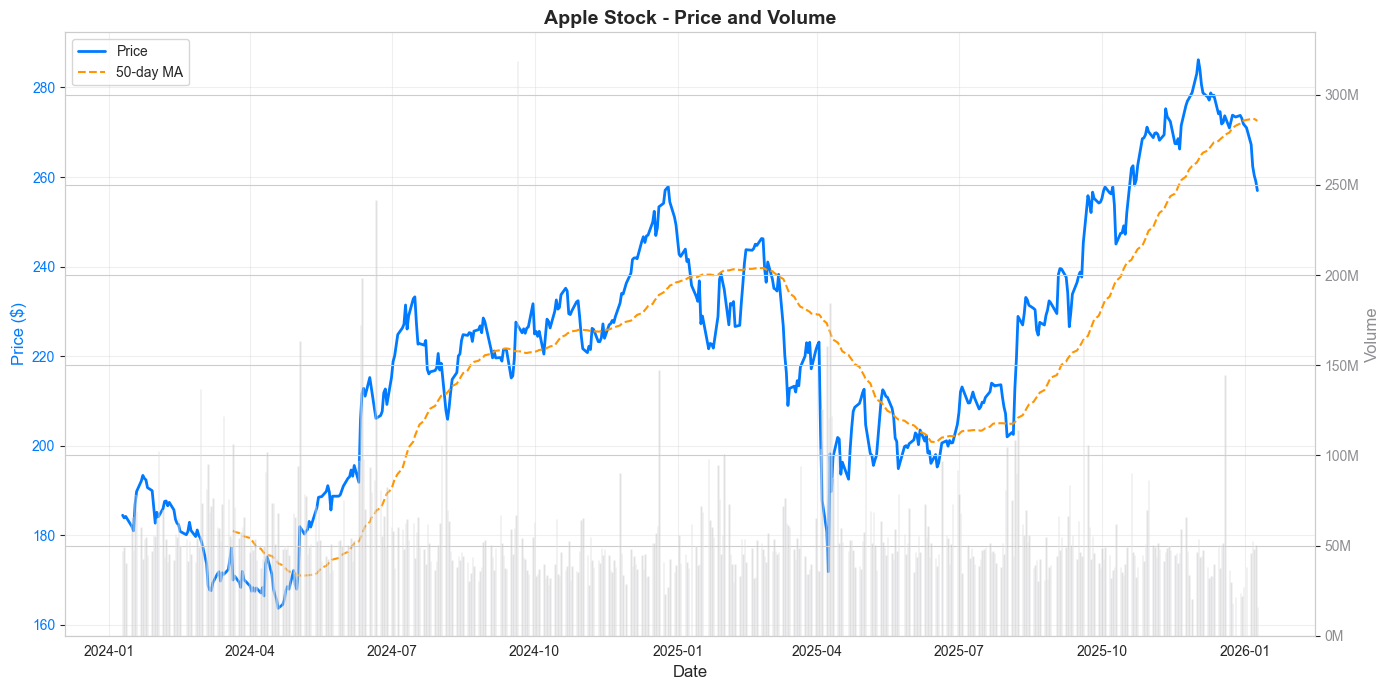

In [22]:
# Create a dual-axis chart with price and volume
stock = 'Apple'

fig, ax1 = plt.subplots(figsize=(14, 7))

# Price line
color1 = '#007AFF'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Price ($)', color=color1, fontsize=12)
ax1.plot(prices.index, prices[stock], color=color1, linewidth=2, label='Price')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Volume bars on secondary axis
ax2 = ax1.twinx()
color2 = '#8E8E93'
ax2.set_ylabel('Volume', color=color2, fontsize=12)
ax2.bar(volume.index, volume[stock], alpha=0.3, color=color2, width=1)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add moving average
ma_50 = prices[stock].rolling(window=50).mean()
ax1.plot(prices.index, ma_50, color='#FF9500', linewidth=1.5, linestyle='--', label='50-day MA')

ax1.set_title(f'{stock} Stock - Price and Volume', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 7.2 Rolling Correlation Heatmap Over Time

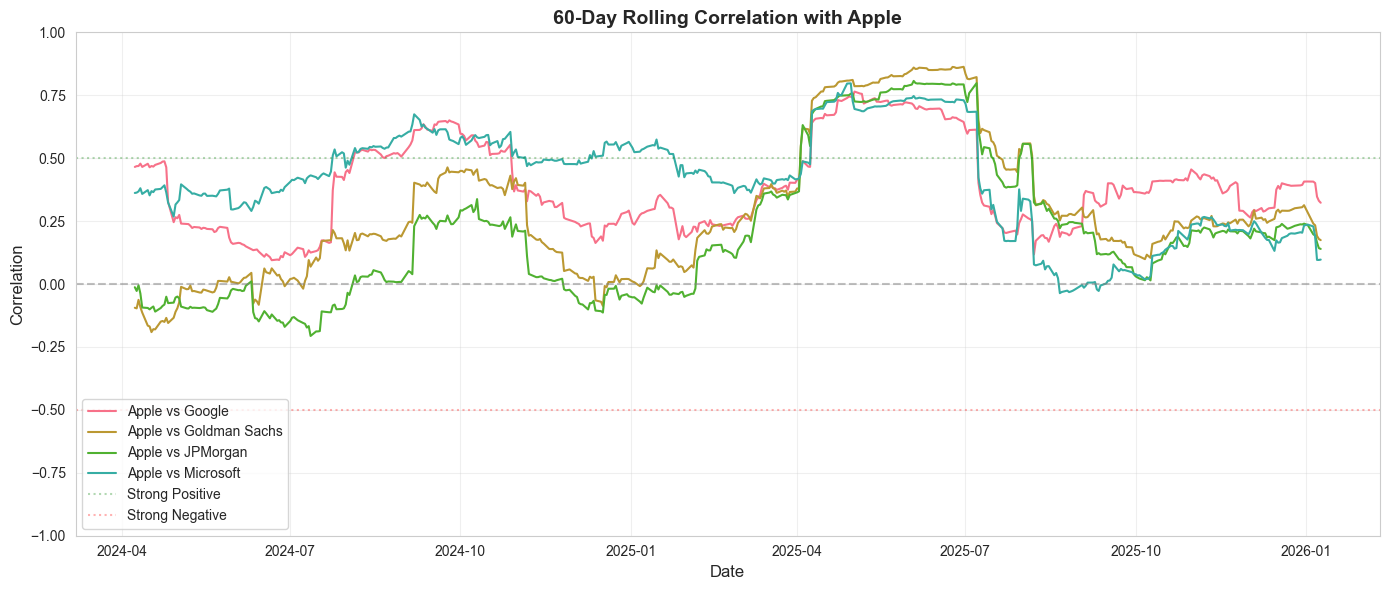

In [23]:
# Calculate rolling correlation between Apple and other stocks
window = 60

rolling_corr = pd.DataFrame()
base_stock = 'Apple'

for stock in returns.columns:
    if stock != base_stock:
        rolling_corr[stock] = returns[base_stock].rolling(window=window).corr(returns[stock])

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

for i, stock in enumerate(rolling_corr.columns):
    ax.plot(rolling_corr.index, rolling_corr[stock], 
            label=f'{base_stock} vs {stock}', linewidth=1.5)

ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axhline(y=0.5, color='green', linestyle=':', alpha=0.3, label='Strong Positive')
ax.axhline(y=-0.5, color='red', linestyle=':', alpha=0.3, label='Strong Negative')

ax.set_title(f'{window}-Day Rolling Correlation with {base_stock}', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

### 7.3 Monthly Returns Heatmap

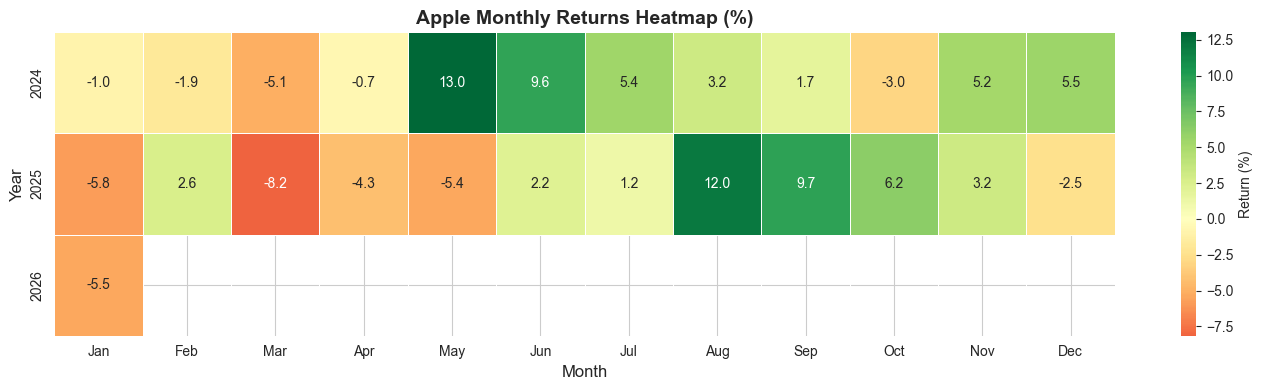

In [24]:
# Calculate monthly returns for Apple
monthly_returns = returns['Apple'].resample('M').apply(lambda x: (1 + x).prod() - 1) * 100

# Create pivot table by year and month
monthly_returns_df = pd.DataFrame({
    'Year': monthly_returns.index.year,
    'Month': monthly_returns.index.month,
    'Return': monthly_returns.values
})

monthly_pivot = monthly_returns_df.pivot(index='Year', columns='Month', values='Return')
monthly_pivot.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][:len(monthly_pivot.columns)]

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 4))

sns.heatmap(monthly_pivot, 
            annot=True, 
            fmt='.1f',
            cmap='RdYlGn',
            center=0,
            linewidths=0.5,
            ax=ax,
            cbar_kws={'label': 'Return (%)'})

ax.set_title('Apple Monthly Returns Heatmap (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Year', fontsize=12)

plt.tight_layout()
plt.show()

### 7.4 Efficient Frontier Visualization

# Efficient Frontier Visualization

## Definition
The Efficient Frontier is a graphical representation from Modern Portfolio Theory (MPT) that shows the set of optimal investment portfolios offering the highest expected return for each level of risk, or the lowest risk for each level of return.

## What the Chart Shows

### X-Axis: Risk (Volatility/Standard Deviation)
- Measures the portfolio's volatility or uncertainty
- Moving right = taking on more risk
- Typically shown as annualized standard deviation (%)

### Y-Axis: Return (Expected Return)
- Measures the portfolio's expected annual return
- Moving up = higher potential returns
- Typically shown as annualized return (%)

### The Curve (Efficient Frontier)
- Each point represents a different portfolio mix of assets
- Portfolios on the curve are "efficient" - they maximize return for their risk level
- Portfolios below the curve are "inefficient" - you could get better returns for the same risk

## Key Points on the Chart

### Minimum Variance Portfolio
- The leftmost point on the frontier
- Offers the lowest possible risk
- May not have the highest return, but is the most stable

### Maximum Sharpe Ratio Portfolio
- Often marked with a special indicator (star or dot)
- The "optimal" portfolio with the best risk-adjusted return
- Located where a line from the risk-free rate is tangent to the frontier

### Individual Assets
- Usually plotted as dots on the chart
- Most individual assets fall below the efficient frontier
- Shows that diversification can improve risk/return profiles

## What It Teaches Investors

### Diversification Benefits
Combining assets can create portfolios that lie above individual asset positions, demonstrating that diversification reduces risk without sacrificing returns.

### Risk-Return Tradeoff
Higher returns require accepting higher risk. There's no "free lunch" - you can't get the highest return with the lowest risk.

### Portfolio Optimization
Identifies which asset allocation provides the best outcome based on your risk tolerance.

### Inefficient Portfolios
Any portfolio below the curve is suboptimal - you could do better by reallocating assets.

## How It's Used

### Asset Allocation
Investors choose a point on the frontier based on their risk tolerance:
- **Conservative**: Left side (low risk, lower returns)
- **Moderate**: Middle section (balanced risk/return)
- **Aggressive**: Right side (high risk, higher returns)

### Performance Evaluation
Compare actual portfolio performance against the efficient frontier to see if portfolio management is adding value.

### Rebalancing Decisions
When portfolios drift from the efficient frontier due to market movements, it signals a need to rebalance.

## Limitations to Understand

- Based on historical data (future may differ)
- Assumes normal distribution of returns (real markets have fat tails)
- Doesn't account for transaction costs, taxes, or liquidity
- Requires accurate estimates of expected returns, volatilities, and correlations
- Static snapshot (efficient frontier changes over time)

## Practical Example
If you're looking at a frontier with stocks and bonds:
- Far left: 100% bonds (low risk, low return)
- Far right: 100% stocks (high risk, high return)  
- Optimal point: Maybe 60% stocks/40% bonds (best risk-adjusted return)
- Points on the curve: Various efficient mixes in between

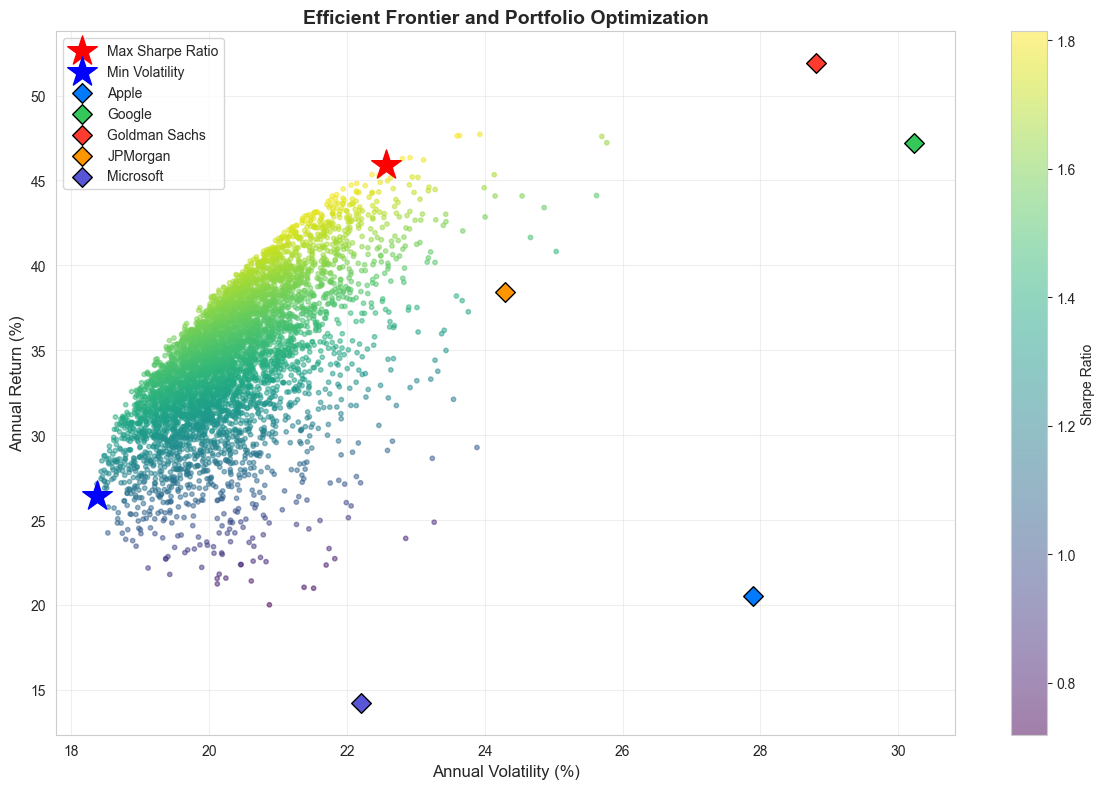


Max Sharpe Ratio Portfolio:
Expected Return: 45.93%
Volatility: 22.57%
Sharpe Ratio: 1.81

Weights:
  Apple: 2.8%
  Google: 42.9%
  Goldman Sachs: 33.0%
  JPMorgan: 20.6%
  Microsoft: 0.8%


In [25]:
# Generate random portfolios for efficient frontier visualization
num_portfolios = 5000
results = np.zeros((4, num_portfolios))
weights_record = []

# Calculate mean returns and covariance
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_assets = len(returns.columns)
risk_free_rate = 0.05

np.random.seed(42)

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    weights_record.append(weights)
    
    # Portfolio return
    portfolio_return = np.sum(mean_returns * weights)
    
    # Portfolio volatility
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Sharpe ratio
    sharpe = (portfolio_return - risk_free_rate) / portfolio_std
    
    results[0, i] = portfolio_std * 100
    results[1, i] = portfolio_return * 100
    results[2, i] = sharpe

# Find the portfolio with max Sharpe ratio
max_sharpe_idx = results[2].argmax()
max_sharpe_port = results[:, max_sharpe_idx]

# Find minimum volatility portfolio
min_vol_idx = results[0].argmin()
min_vol_port = results[:, min_vol_idx]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of all portfolios
scatter = ax.scatter(results[0], results[1], c=results[2], cmap='viridis', 
                     marker='o', s=10, alpha=0.5)
plt.colorbar(scatter, ax=ax, label='Sharpe Ratio')

# Mark maximum Sharpe portfolio
ax.scatter(max_sharpe_port[0], max_sharpe_port[1], marker='*', 
           color='red', s=500, label='Max Sharpe Ratio')

# Mark minimum volatility portfolio
ax.scatter(min_vol_port[0], min_vol_port[1], marker='*', 
           color='blue', s=500, label='Min Volatility')

# Plot individual stocks
for i, stock in enumerate(returns.columns):
    ax.scatter(np.sqrt(cov_matrix.iloc[i, i]) * 100, 
               mean_returns[stock] * 100,
               marker='D', s=100, color=colors[i], edgecolor='black',
               label=stock, zorder=5)

ax.set_title('Efficient Frontier and Portfolio Optimization', fontsize=14, fontweight='bold')
ax.set_xlabel('Annual Volatility (%)', fontsize=12)
ax.set_ylabel('Annual Return (%)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print optimal portfolio weights
print("\nMax Sharpe Ratio Portfolio:")
print(f"Expected Return: {max_sharpe_port[1]:.2f}%")
print(f"Volatility: {max_sharpe_port[0]:.2f}%")
print(f"Sharpe Ratio: {max_sharpe_port[2]:.2f}")
print("\nWeights:")
for stock, weight in zip(returns.columns, weights_record[max_sharpe_idx]):
    print(f"  {stock}: {weight*100:.1f}%")

## 8. Combining Matplotlib, Pyplot, and Seaborn

Here's an example of how to create a professional dashboard combining all three.

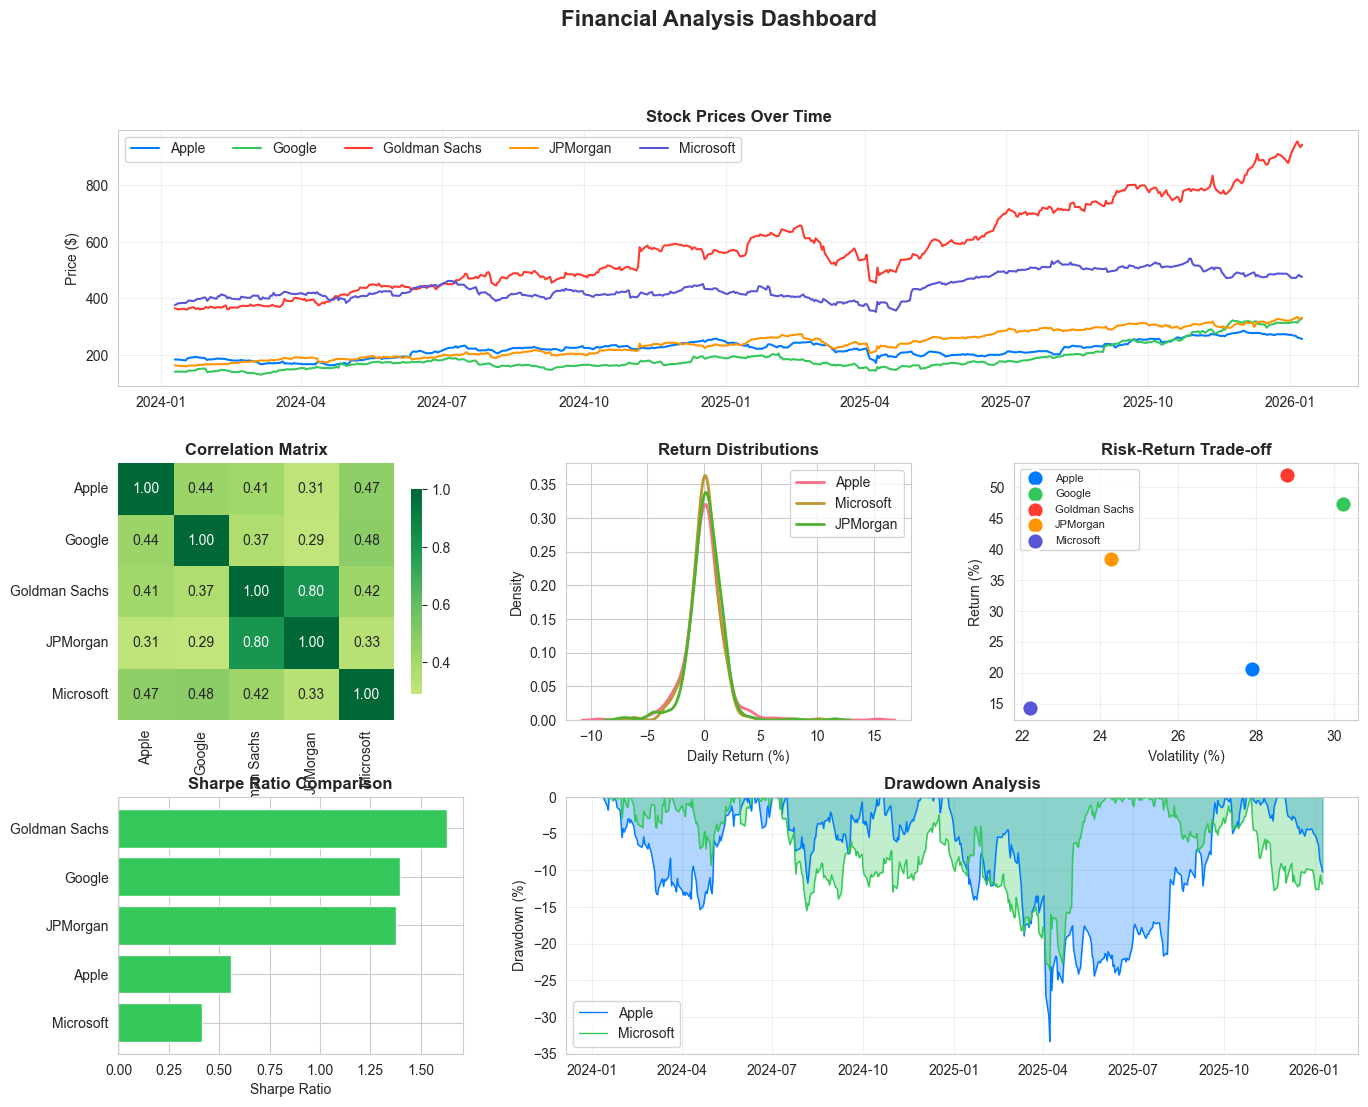

In [26]:
# Create a comprehensive financial dashboard
fig = plt.figure(figsize=(16, 12))

# Define grid layout
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Price Chart (top row, full width)
ax1 = fig.add_subplot(gs[0, :])
for i, stock in enumerate(prices.columns):
    ax1.plot(prices.index, prices[stock], label=stock, color=colors[i], linewidth=1.5)
ax1.set_title('Stock Prices Over Time', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left', ncol=5)
ax1.grid(True, alpha=0.3)

# 2. Correlation Heatmap (middle left)
ax2 = fig.add_subplot(gs[1, 0])
sns.heatmap(returns.corr(), annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# 3. Return Distribution (middle center)
ax3 = fig.add_subplot(gs[1, 1])
for i, stock in enumerate(['Apple', 'Microsoft', 'JPMorgan']):
    sns.kdeplot(data=returns[stock] * 100, ax=ax3, label=stock, linewidth=2)
ax3.set_title('Return Distributions', fontsize=12, fontweight='bold')
ax3.set_xlabel('Daily Return (%)')
ax3.legend()

# 4. Risk-Return Scatter (middle right)
ax4 = fig.add_subplot(gs[1, 2])
for i, stock in enumerate(risk_df.index):
    ax4.scatter(risk_df.loc[stock, 'Annual Volatility'] * 100, 
                risk_df.loc[stock, 'Annual Return'] * 100,
                s=150, c=colors[i], label=stock, edgecolor='white', linewidth=2)
ax4.set_xlabel('Volatility (%)')
ax4.set_ylabel('Return (%)')
ax4.set_title('Risk-Return Trade-off', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# 5. Sharpe Ratio Bar (bottom left)
ax5 = fig.add_subplot(gs[2, 0])
sharpe_sorted = risk_df['Sharpe Ratio'].sort_values()
bar_colors = ['#34C759' if x > 0 else '#FF3B30' for x in sharpe_sorted]
ax5.barh(sharpe_sorted.index, sharpe_sorted.values, color=bar_colors)
ax5.set_xlabel('Sharpe Ratio')
ax5.set_title('Sharpe Ratio Comparison', fontsize=12, fontweight='bold')
ax5.axvline(x=0, color='black', linewidth=0.8)

# 6. Drawdown Chart (bottom center and right)
ax6 = fig.add_subplot(gs[2, 1:])
for i, stock in enumerate(['Apple', 'Microsoft']):
    ax6.fill_between(drawdowns.index, drawdowns[stock], 0, alpha=0.3, color=colors[i])
    ax6.plot(drawdowns.index, drawdowns[stock], linewidth=1, color=colors[i], label=stock)
ax6.set_title('Drawdown Analysis', fontsize=12, fontweight='bold')
ax6.set_ylabel('Drawdown (%)')
ax6.legend()
ax6.set_ylim(top=0)
ax6.grid(True, alpha=0.3)

plt.suptitle('Financial Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 9. Best Practices and Tips

### 9.1 Choosing the Right Chart Type

| Data Type | Recommended Chart | Purpose |
|-----------|------------------|----------|
| Time series prices | Line chart | Show trends over time |
| Returns distribution | Histogram/KDE | Understand risk profile |
| Comparing categories | Bar chart | Compare discrete values |
| Correlations | Heatmap | Show relationships |
| Risk vs Return | Scatter plot | Multi-dimensional comparison |
| Part of whole | Pie chart (use sparingly) | Portfolio allocation |
| Multiple distributions | Box/Violin plot | Compare distributions |

### 9.2 Style Guidelines for Financial Charts

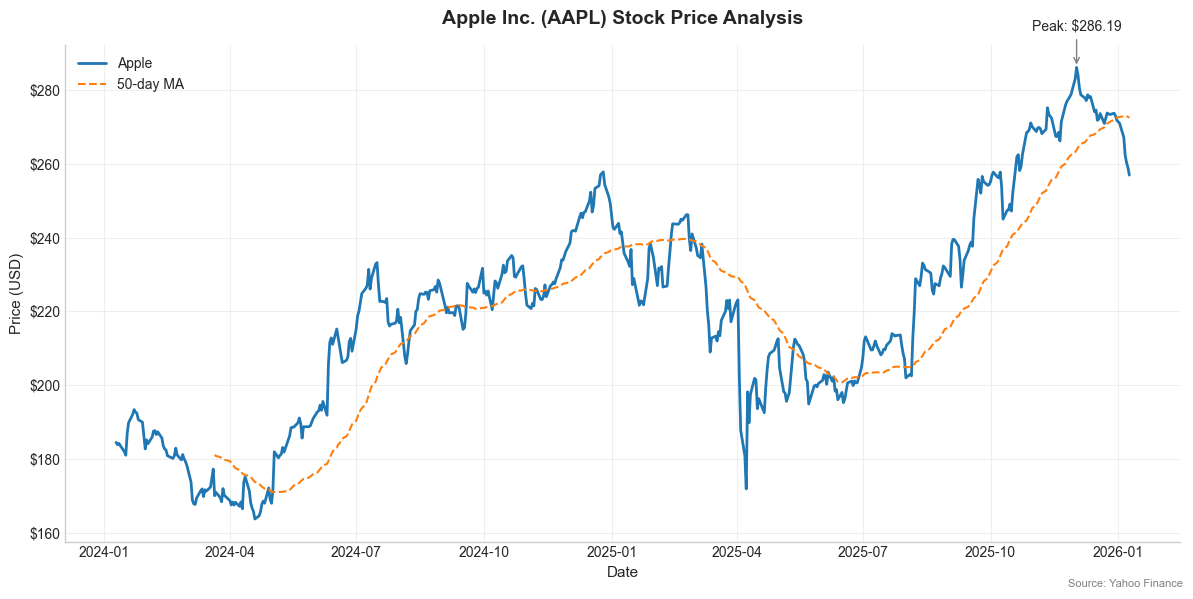

In [27]:
# Example: Professional styling for financial reports

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')

# Define a professional color palette
professional_colors = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'positive': '#2ca02c',
    'negative': '#d62728',
    'neutral': '#7f7f7f'
}

fig, ax = plt.subplots(figsize=(12, 6))

# Plot with professional styling
ax.plot(prices['Apple'], color=professional_colors['primary'], 
        linewidth=2, label='Apple')

# Add 50-day moving average
ma_50 = prices['Apple'].rolling(50).mean()
ax.plot(ma_50, color=professional_colors['secondary'], 
        linewidth=1.5, linestyle='--', label='50-day MA')

# Professional title and labels
ax.set_title('Apple Inc. (AAPL) Stock Price Analysis', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Price (USD)', fontsize=11)

# Format axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add annotations
max_price = prices['Apple'].max()
max_date = prices['Apple'].idxmax()
ax.annotate(f'Peak: ${max_price:.2f}', 
            xy=(max_date, max_price),
            xytext=(max_date, max_price + 10),
            fontsize=10, ha='center',
            arrowprops=dict(arrowstyle='->', color='gray'))

# Legend and grid
ax.legend(loc='upper left', framealpha=0.9)
ax.grid(True, alpha=0.3)

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data source note
fig.text(0.99, 0.01, 'Source: Yahoo Finance', 
         ha='right', va='bottom', fontsize=8, color='gray')

plt.tight_layout()
plt.show()

### 9.3 Saving Charts for Reports

Tip: Uncomment the savefig lines to save the charts!

Recommended formats:
- PNG (dpi=300): Best for presentations and reports
- PDF: Best for academic papers and print
- SVG: Best for web and when you need to edit later


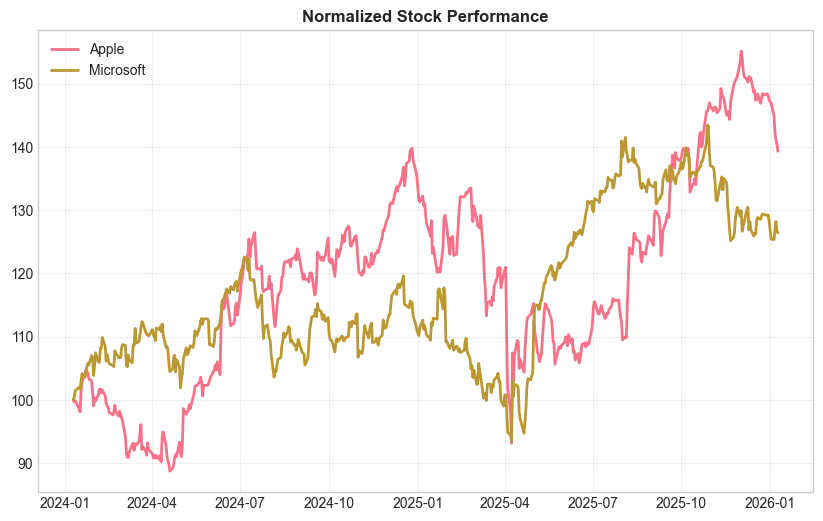

In [28]:
# Example: Save a high-quality figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(normalized_prices['Apple'], label='Apple', linewidth=2)
ax.plot(normalized_prices['Microsoft'], label='Microsoft', linewidth=2)
ax.set_title('Normalized Stock Performance', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Save in different formats
# PNG for presentations (raster, good quality)
# fig.savefig('stock_performance.png', dpi=300, bbox_inches='tight')

# PDF for publications (vector, scalable)
# fig.savefig('stock_performance.pdf', bbox_inches='tight')

# SVG for web (vector, editable)
# fig.savefig('stock_performance.svg', bbox_inches='tight')

print("Tip: Uncomment the savefig lines to save the charts!")
print("\nRecommended formats:")
print("- PNG (dpi=300): Best for presentations and reports")
print("- PDF: Best for academic papers and print")
print("- SVG: Best for web and when you need to edit later")

plt.show()

## 10. Summary and Key Takeaways

### What We Covered:

1. **Matplotlib Basics**
   - Figure and Axes concepts
   - Line, bar, scatter plots
   - Subplots and layouts

2. **Seaborn Features**
   - Distribution plots (histograms, KDE)
   - Statistical plots (box, violin)
   - Correlation heatmaps
   - Regression plots

3. **Financial Metrics**
   - Sharpe Ratio, Sortino Ratio
   - Maximum Drawdown
   - Value at Risk (VaR)
   - Rolling statistics

4. **Advanced Techniques**
   - Candlestick charts
   - Efficient frontier
   - Professional dashboards
   - Custom styling

### Quick Reference:

```python
# Basic Matplotlib/Pyplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)
ax.set_title('Title')
plt.show()

# Basic Seaborn
sns.set_style('whitegrid')
sns.histplot(data, kde=True)
sns.heatmap(corr_matrix, annot=True)

# Financial Ratios
sharpe = (return - rf) / volatility
max_drawdown = (cumulative - rolling_max) / rolling_max
```

### Next Steps:

1. Practice with your own financial data
2. Explore the Matplotlib and Seaborn documentation
3. Try creating interactive plots with Plotly
4. Build your own financial dashboard

In [29]:
print("Congratulations! You've completed the Finance Visualization Tutorial!")
print("\nYou now know how to:")
print("  - Create professional financial charts")
print("  - Calculate and visualize key financial ratios")
print("  - Combine Matplotlib, Pyplot, and Seaborn effectively")
print("  - Build comprehensive financial dashboards")

Congratulations! You've completed the Finance Visualization Tutorial!

You now know how to:
  - Create professional financial charts
  - Calculate and visualize key financial ratios
  - Combine Matplotlib, Pyplot, and Seaborn effectively
  - Build comprehensive financial dashboards
